# Housing Prices
--------------------------------------------------------------------------------------------------------------------------------

In [1]:
# Importamos las librerias Pandas y Numpy. Son bastantes populares y se utilizan
# Para la manipulación y análisis de datos

import pandas as pd
import numpy as np

In [2]:
# Se carga el archivo housing.csv en un Dataframe de pandas al que llamaremos df
df = pd.read_csv('housing.csv')
# Mostramos las 10 primeras filas
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


0.   longitude           
1.   latitude            
2.   housing_median_age  
3.   total_rooms    
4.   total_bedrooms
5.   population
6.   households   
7.   median_income
8.   median_house_value 
9.   ocean_proximity

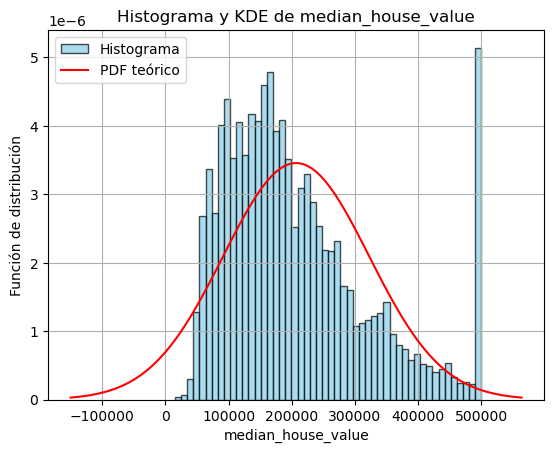

Área del histograma =  1.0 , luego verifica que es una funcion de densidad


In [3]:
# Podemos calcular la función de densidad de por ejemplo el median_house_value

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import norm


# Datos de ejemplo (edad media de los edificios)
edades_edificios = df['median_house_value']

# Crear la función de densidad kernel (KDE)
kde = gaussian_kde(edades_edificios)

# La KDE suaviza el histograma de los datos, proporcionando una estimación continua 
# de la función de densidad de probabilidad. La suavidad de la KDE está controlada 
# por un parámetro de ancho de banda, que determina cuánto se suavizan los datos. 
# Un ancho de banda más pequeño produce una estimación más detallada pero más ruidosa
# mientras que un ancho de banda más grande produce una estimación más suave pero menos detallada
# Basicamente hacer una interpolacion

# Calcular los puntos para graficar la función de densidad
x = np.linspace(min(edades_edificios), max(edades_edificios), 1000)
y = kde(x)

# Graficar el histograma y la función de densidad
hist, bins = np.histogram(edades_edificios, bins=10, density=True)
plt.hist(edades_edificios, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histograma')
#plt.plot(x, y, color='red', label='Función de Densidad Kernel (KDE)')
plt.title('Histograma y KDE de median_house_value')
plt.xlabel('median_house_value')
plt.ylabel('Función de distribución')

dist = norm(loc=np.mean(df['median_house_value']), scale=np.std(df['median_house_value']))
x = np.linspace(dist.ppf(0.001),
                dist.ppf(0.999), 100)
plt.plot(x, dist.pdf(x), "r-", label="PDF teórico")
plt.legend()

plt.legend()
plt.grid(True)
plt.show()

# Calcular el ancho de cada barra del histograma
widths = np.diff(bins)

# Calcular el área total del histograma
area_histograma = np.sum(hist * widths)

print("Área del histograma = ", area_histograma, ", luego verifica que es una funcion de densidad")

In [4]:
# Mostramos por pantalla el total de entradas de nuestro dataset usando la función shape()

print("Número de entradas antes de la limpieza:", df.shape[0])

# Creamos una lista que contiene los nombres de las columnas que queremos verificar

cols_to_check = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
                 'population', 'households', 'median_income', 'median_house_value']

# Iteramos por todas las columnas y nos quedamos sólo con aquellas cuyos valores
# Sean mayores que cero

for col in cols_to_check[1:]:
    df = df[df[col] >= 0]
df = df[df['longitude'] <= 0]
df = df[df['median_house_value'] >= 0]

# Además, limpiamos los valores de longitud y latitud para que estén dentro de los rangos adecuados
df = df[(df['longitude'] >= -180) & (df['longitude'] <= 180)]
df = df[(df['latitude'] >= -90) & (df['latitude'] <= 90)]

# También limpiamos las filas que no contienen los valores específicos en la columna 'ocean_proximity'
valid_values = ['INLAND', '<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN']
df = df[df['ocean_proximity'].isin(valid_values)]

# Finalmente mostramos de nuevo por pantalla el número de entradas tras la limpieza
print("Número de entradas despues de la limpieza:", df.shape[0])

Número de entradas antes de la limpieza: 20640
Número de entradas despues de la limpieza: 20428


Codificamos las variables cualitativas

In [5]:
#Mostramos todos los valores que toma la variable ocean_proximity
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN'], dtype=object)

In [6]:
# Asignamos a cada variable cualitativa, un peso

# NEAR BAY -> 1
# <1H OCEAN -> 2
# INLANDS -> 3
# NEAR OCEAN -> 4

Oceanvalues={'NEAR BAY':1,'<1H OCEAN':2,'INLAND':3,'NEAR OCEAN':4, np.nan:0}
df['ocean_proximity'] = df['ocean_proximity'].map(Oceanvalues)
cols_to_check = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
                 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
df['ocean_proximity'].unique()

array([1, 2, 3, 4], dtype=int64)

Tenemos una serie de muestras de cada variable. Como desconocemos la distribución que sigue cada
variable, tenemos que usar las muestras. Para calcular la media muestral, sabemos que viene dada por
X = 1/n * sum n (xi)
Para saber cómo de buena es esta aproximación de la media poblacional a la media muestral, tenemos que 
sacar un intervalo de confianza

Ahora procedemos a calcular las medias de las siguiente variables:
    
- housing_median_age  
- total_rooms        
- total_bedrooms   
- population
- households      
- median_income 
- median_house_value
- ocean_proximity

In [7]:
# Inicializamos una lista para guardar los valores de la media
means_list = [] # lista para el cálculo manual
means_list_func = [] #lista para el cálculo haciendo uso de la funcion

# Calculamos la media de cada columna individualmente 
for col in cols_to_check:
    # Sumamos todos los valores de la columna
    col_sum = df[col].sum()
    # Contamos el número de filas totales de dicha columna
    col_count = df[col].count()
    # Calculamos la media como la suma total entre el número de filas
    col_mean = col_sum / col_count
    # Utilizamos la funcion mean()
    col_mean_func = df[col].mean()
    # Agregamos el valor obtenido a la lista previamente definida
    means_list.append(col_mean)
    means_list_func.append(col_mean_func)

# Tras esto tenemos una lista con las medias de las variables anteriormente mencionadas
print(means_list, '\n-----\n', means_list_func)

[-119.57098639122775, 35.633778147640484, 28.629723908361072, 2636.764147248874, 537.8993048756608, 1425.1322204816918, 499.4880066575289, 3.871437384961817, 206821.9284315645, 2.4641668298413943] 
-----
 [-119.57098639122489, 35.63377814764065, 28.629723908361072, 2636.764147248874, 537.8993048756608, 1425.1322204816918, 499.4880066575289, 3.8714373849618644, 206821.9284315645, 2.4641668298413943]


Ahora calcularemos las medianas de las mismas variables, para ello:

In [8]:
# Inicializamos una lista para guardar las medianas
medians_list = []
medians_list_func =[]

# Calculamos la mediana de cada columna individualmente
for col in cols_to_check:
    # Ordenamos los valores de la columna
    sorted_values = df[col].sort_values()
    # Contamos el número total de entradas de la variable
    col_count = sorted_values.count()
    # Calculamos el índice medio
    middle_index = col_count // 2
    # Si el número de valores es impar, la mediana es el valor en el índice medio
    if col_count % 2 != 0:
        col_median = sorted_values.iloc[middle_index]
    # Si el número de valores es par, la mediana es el promedio de los dos valores en el medio
    else:
        col_median = (sorted_values.iloc[middle_index - 1] + sorted_values.iloc[middle_index]) / 2
    # Usamos la función median()
    col_median_func = df[col].median()
    # Agregamos la mediana calculada a la lista de medianas
    medians_list.append(col_median)
    medians_list_func.append(col_median_func)
    
# Tras esto tenemos una lista con las medianas de las variables anteriormente mencionadas
print(medians_list, '\n-----\n', medians_list_func)

[-118.5, 34.26, 29.0, 2127.0, 435.0, 1166.0, 409.0, 3.5375, 179700.0, 2.0] 
-----
 [-118.5, 34.26, 29.0, 2127.0, 435.0, 1166.0, 409.0, 3.5375, 179700.0, 2.0]


Ahora calcularemos los valores mínimos y máximos de cada variable, para ello:

In [9]:
# Inicializamos las  listas para almacenar los mínimos y máximos de cada columna
min_values = []
max_values = []

# Calculamos los mínimos y máximos de cada columna individualmente
for col in cols_to_check:
    # Calculamos el mínimo valor de la columna y lo agregamos  a la lista de mínimos usando la función min()
    min_val = df[col].min()
    min_values.append(min_val)
    
    # Calculamos el máximo valor de la columna y lo agregamos a la lista de máximos usando la función max()
    max_val = df[col].max()
    max_values.append(max_val)
print(min_values, '\n-----\n', max_values)

[-124.35, 32.54, 1.0, 2.0, 1.0, 3.0, 1.0, 0.4999, 14999.0, 1] 
-----
 [-114.31, 41.95, 52.0, 39320.0, 6445.0, 35682.0, 6082.0, 15.0001, 500001.0, 4]


Ahora calcularemos la desviación típica de cada variable, para ello:
Podemos hacer uso de la fórmula matemática para calcular la desviación típica, o podemos hacer uso de una 
Función de la librería Pandas para calcularla de forma más sencilla

In [10]:
# Inicializamos una lista para almacenar las desviaciones estándar de cada columna
std_devs = []

# Calculamos las desviaciones estándar de cada columna individualmente
for col in cols_to_check:
    # Calculamos la desviacón estándar usando la función std() y la agregamos a la lista
    std_dev = df[col].std()
    std_devs.append(std_dev)
std_devs

[2.003732406356741,
 2.1363124194602987,
 12.590156065238101,
 2185.4514086076547,
 421.4259699351803,
 1133.277417705654,
 382.3268314466577,
 1.8994316945924181,
 115412.33745206622,
 0.8533988074877632]

Igual que con la mediana, aqui calculamos la varianza muestral

In [11]:
# Inicializamos una lista para almacenar las varianzas de cada columna
variances = []
variances_theo = []

# Calcular las varianzas de cada columna individualmente
# std_dev tomará el valor de cada deviacón estándar de la lista std_devs
for (col, std_dev) in zip(cols_to_check, std_devs):
    # Elevamos al cuadrado la desviación estándar
    squared_deviation = std_dev ** 2
    # Calculos las diferencias al cuadrado 
    diff = (df[col] - df[col].mean()) ** 2
    # Obtenemos la varianza
    var = sum(diff) / len(df[col]) 
    # Agregamos la varianza calculada a la lista
    variances.append(squared_deviation)
    # Agregamos la varianza teorica calculada a la lista
    variances_theo.append(var)
print(variances, '\n----\n', variances_theo)

[4.014943556284176, 4.563830753540315, 158.51202974705174, 4776197.859385182, 177599.8481358075, 1284317.7054815954, 146173.806044041, 3.6078407624222253, 13320007636.149607, 0.7282895246215363] 
----
 [4.014747015087961, 4.563607342988449, 158.504270199874, 4775964.052949928, 177591.15419376054, 1284254.8350241117, 146166.6504827504, 3.6076641498922455, 13319355589.564716, 0.7282538730881204]


In [12]:
# Printeamos la información
for k in range (len(cols_to_check)) :
    print("\n-->", cols_to_check[k], "-> variance: ", variances[k])
    print("-->", cols_to_check[k], "-> mean: ", means_list[k])
    print("-->", cols_to_check[k], "-> std: ", std_devs[k])
    print("-->", cols_to_check[k], "-> median: ", medians_list[k], '\n')


--> longitude -> variance:  4.014943556284176
--> longitude -> mean:  -119.57098639122775
--> longitude -> std:  2.003732406356741
--> longitude -> median:  -118.5 


--> latitude -> variance:  4.563830753540315
--> latitude -> mean:  35.633778147640484
--> latitude -> std:  2.1363124194602987
--> latitude -> median:  34.26 


--> housing_median_age -> variance:  158.51202974705174
--> housing_median_age -> mean:  28.629723908361072
--> housing_median_age -> std:  12.590156065238101
--> housing_median_age -> median:  29.0 


--> total_rooms -> variance:  4776197.859385182
--> total_rooms -> mean:  2636.764147248874
--> total_rooms -> std:  2185.4514086076547
--> total_rooms -> median:  2127.0 


--> total_bedrooms -> variance:  177599.8481358075
--> total_bedrooms -> mean:  537.8993048756608
--> total_bedrooms -> std:  421.4259699351803
--> total_bedrooms -> median:  435.0 


--> population -> variance:  1284317.7054815954
--> population -> mean:  1425.1322204816918
--> population -> 

In [13]:
#Matriz de covarianzas usando el comando cov
cov = df.cov()
cov

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,4.014944,-3.957961,-2.763796,1.994872e+02,5.881635e+01,2.279404e+02,4.336312e+01,-0.058854,-1.055488e+04,0.309439
latitude,-3.957961,4.563831,0.327909,-1.718082e+02,-6.037892e+01,-2.643598e+02,-5.875775e+01,-0.323793,-3.558104e+04,-0.122675
housing_median_age,-2.763796,0.327909,158.512030,-9.922918e+03,-1.700442e+03,-4.219296e+03,-1.457132e+03,-2.826442,1.541369e+05,-2.226761
total_rooms,199.487173,-171.808250,-9922.918098,4.776198e+06,8.568872e+05,2.123227e+06,7.678660e+05,821.183953,3.367646e+07,30.378536
total_bedrooms,58.816353,-60.378915,-1700.442339,8.568872e+05,1.775998e+05,4.192107e+05,1.578582e+05,-6.217002,2.421788e+06,1.542213
population,227.940353,-264.359816,-4219.296220,2.123227e+06,4.192107e+05,1.284318e+06,3.930637e+05,10.738194,-3.278901e+06,-6.367000
households,43.363117,-58.757747,-1457.131528,7.678660e+05,1.578582e+05,3.930637e+05,1.461738e+05,9.695003,2.873512e+06,-4.944548
median_income,-0.058854,-0.323793,-2.826442,8.211840e+02,-6.217002e+00,1.073819e+01,9.695003e+00,3.607841,1.510078e+05,-0.209316
median_house_value,-10554.884838,-35581.037544,154136.900899,3.367646e+07,2.421788e+06,-3.278901e+06,2.873512e+06,151007.759387,1.332001e+10,-21018.890556
ocean_proximity,0.309439,-0.122675,-2.226761,3.037854e+01,1.542213e+00,-6.367000e+00,-4.944548e+00,-0.209316,-2.101889e+04,0.728290


Observamos que la matriz es simetrica y la autocovarianza (covarianza de una variable consigo misma) coincide con la varianza de esa variable

In [14]:
# Calcula la media de cada columna en cols_to_check
means_list = [df[col].mean() for col in cols_to_check]

# Inicializa la matriz de covarianza
Sxy = np.zeros((len(cols_to_check), len(cols_to_check)))

# Calcula la matriz de covarianza
for i, k in enumerate(cols_to_check):
    for j, l in enumerate(cols_to_check):
        Sxy[i, j] = ((df[k] - means_list[i]) * (df[l] - means_list[j])).sum() / (len(df) - 1)

# Convierte la matriz de covarianza a un DataFrame
cov_matrix_df = pd.DataFrame(Sxy, index=cols_to_check, columns=cols_to_check)

# Muestra la matriz de covarianza
print(cov_matrix_df)   

                       longitude      latitude  housing_median_age  \
longitude               4.014944     -3.957961           -2.763796   
latitude               -3.957961      4.563831            0.327909   
housing_median_age     -2.763796      0.327909          158.512030   
total_rooms           199.487173   -171.808250        -9922.918098   
total_bedrooms         58.816353    -60.378915        -1700.442339   
population            227.940353   -264.359816        -4219.296220   
households             43.363117    -58.757747        -1457.131528   
median_income          -0.058854     -0.323793           -2.826442   
median_house_value -10554.884838 -35581.037544       154136.900899   
ocean_proximity         0.309439     -0.122675           -2.226761   

                     total_rooms  total_bedrooms    population    households  \
longitude           1.994872e+02    5.881635e+01  2.279404e+02  4.336312e+01   
latitude           -1.718082e+02   -6.037892e+01 -2.643598e+02 -5.875

In [15]:
#Correlación usando el comando corr
corr = df.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924628,-0.109556,0.045555,0.069653,0.100380,0.056604,-0.015464,-0.045642,0.180960
latitude,-0.924628,1.000000,0.012192,-0.036799,-0.067066,-0.109193,-0.071939,-0.079796,-0.144312,-0.067288
housing_median_age,-0.109556,0.012192,1.000000,-0.360634,-0.320486,-0.295715,-0.302714,-0.118191,0.106077,-0.207248
total_rooms,0.045555,-0.036799,-0.360634,1.000000,0.930382,0.857273,0.918987,0.197822,0.133516,0.016288
total_bedrooms,0.069653,-0.067066,-0.320486,0.930382,1.000000,0.877758,0.979740,-0.007767,0.049792,0.004288
population,0.100380,-0.109193,-0.295715,0.857273,0.877758,1.000000,0.907177,0.004989,-0.025069,-0.006583
households,0.056604,-0.071939,-0.302714,0.918987,0.979740,0.907177,1.000000,0.013350,0.065122,-0.015154
median_income,-0.015464,-0.079796,-0.118191,0.197822,-0.007767,0.004989,0.013350,1.000000,0.688848,-0.129130
median_house_value,-0.045642,-0.144312,0.106077,0.133516,0.049792,-0.025069,0.065122,0.688848,1.000000,-0.213405
ocean_proximity,0.180960,-0.067288,-0.207248,0.016288,0.004288,-0.006583,-0.015154,-0.129130,-0.213405,1.000000


Observamos que cuando la correlacion es negativa, la dependencia es negativa y vicecersa.
La correlacion esta acotada entre -1 y 1, siendo 1 una fuerte dependecia positiva y -1 una fuerte dependencia negativa

<AxesSubplot:>

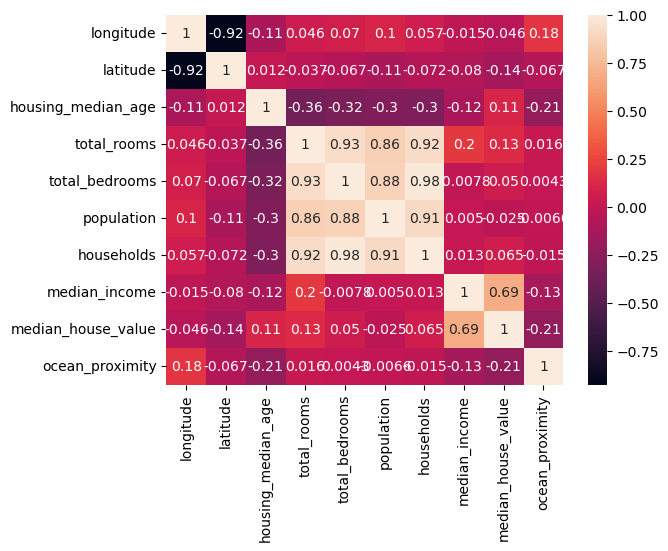

In [16]:
import seaborn as sns
sns.heatmap(corr, annot=True)

In [17]:
# Calcula la desviacion tipica de cada columna en cols_to_check
std_list = [df[col].std() for col in cols_to_check]

# Inicializa la matriz de covarianza
rxy = np.zeros((len(cols_to_check), len(cols_to_check)))

# Calcula la matriz de covarianza
for i, k in enumerate(cols_to_check):
    for j, l in enumerate(cols_to_check):
        rxy[i, j] = Sxy[i][j] / (std_list[i] * std_list[j])

# Convierte la matriz de covarianza a un DataFrame
corr_matrix_df = pd.DataFrame(rxy, index=cols_to_check, columns=cols_to_check)

# Muestra la matriz de covarianza
print(corr_matrix_df)   

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924628           -0.109556     0.045555   
latitude            -0.924628  1.000000            0.012192    -0.036799   
housing_median_age  -0.109556  0.012192            1.000000    -0.360634   
total_rooms          0.045555 -0.036799           -0.360634     1.000000   
total_bedrooms       0.069653 -0.067066           -0.320486     0.930382   
population           0.100380 -0.109193           -0.295715     0.857273   
households           0.056604 -0.071939           -0.302714     0.918987   
median_income       -0.015464 -0.079796           -0.118191     0.197822   
median_house_value  -0.045642 -0.144312            0.106077     0.133516   
ocean_proximity      0.180960 -0.067288           -0.207248     0.016288   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069653    0.100380    0.056604      -0.015464   
latitude 

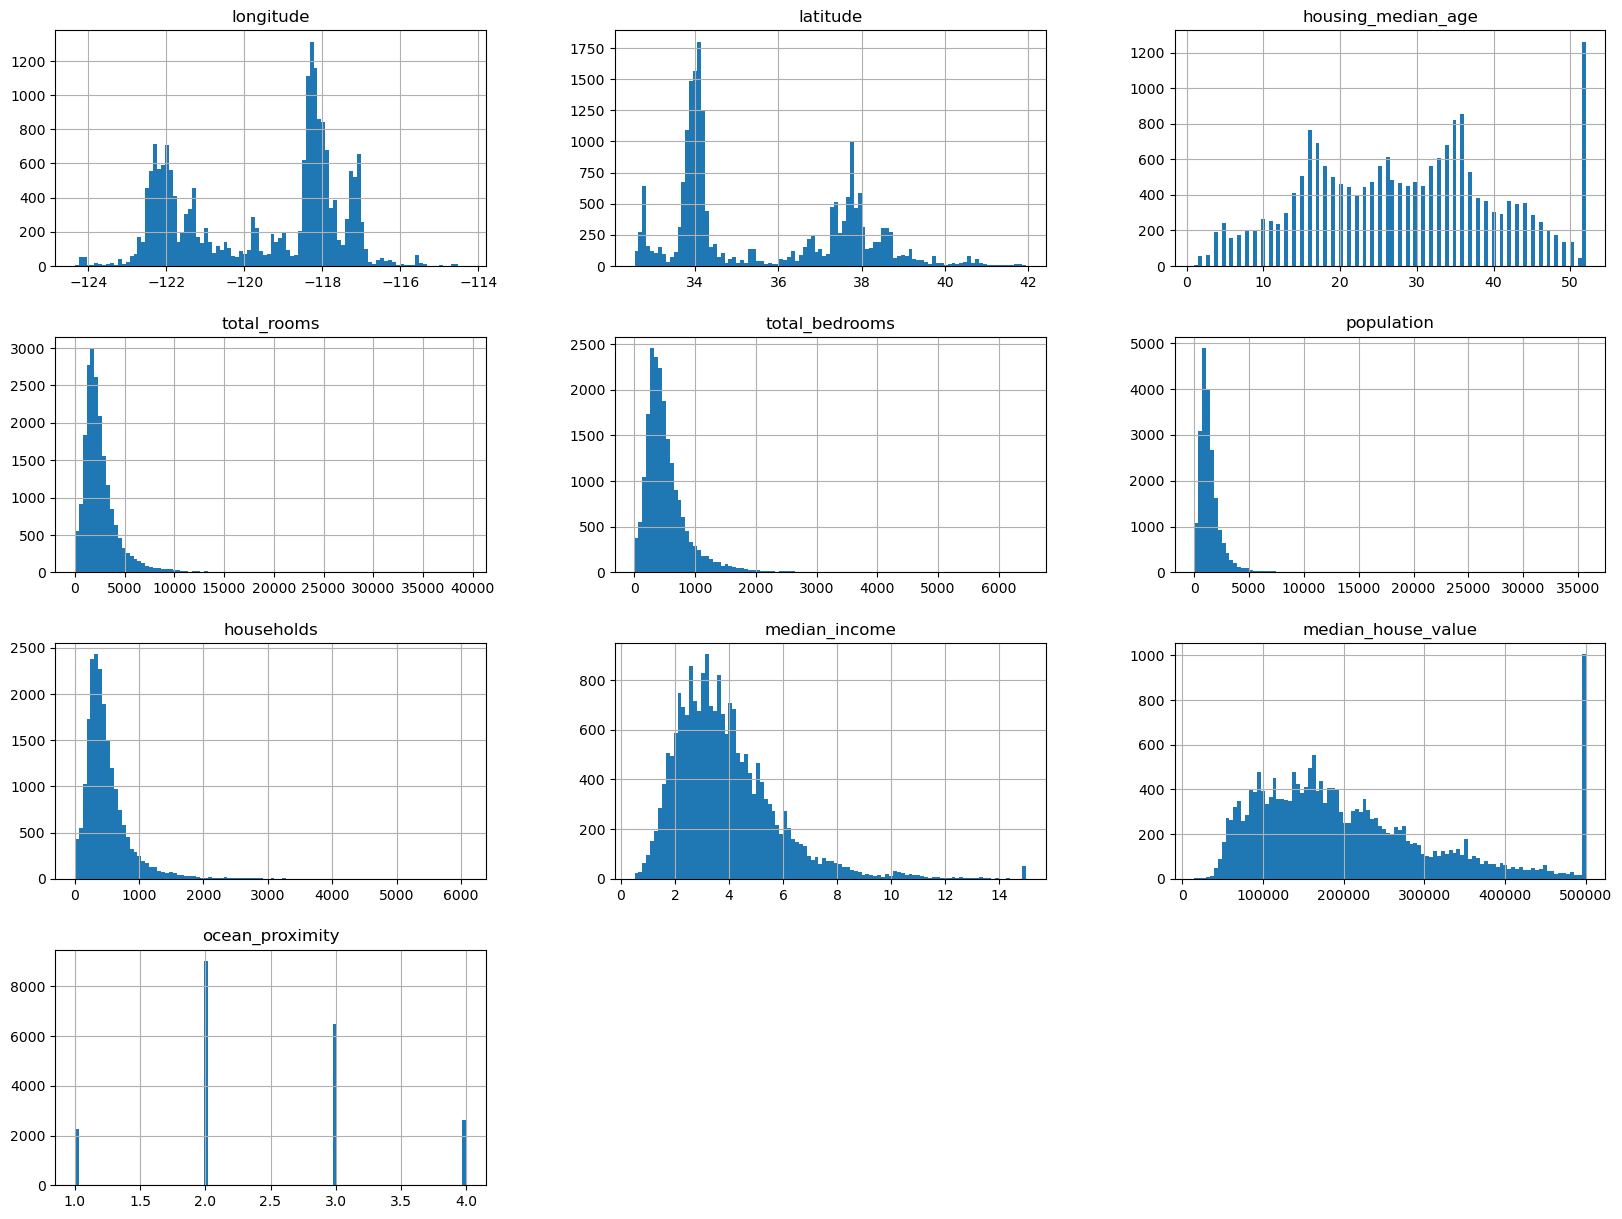

In [18]:
import matplotlib.pyplot as plt
df.hist(bins=100, figsize=(20,15))
plt.show()

Área del histograma =  1.0 , luego verifica que es una funcion de densidad


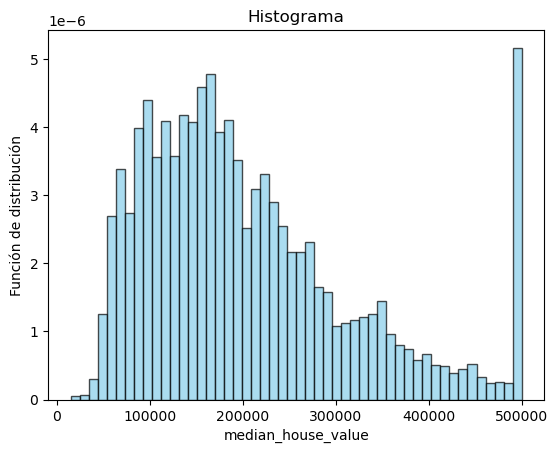

In [19]:
import matplotlib.pyplot as plt

# Datos de ejemplo (edad media de los edificios)
edades_edificios = df['median_house_value']

# Graficar el histograma y la función de densidad
hist, bins = np.histogram(edades_edificios, bins=10, density=True)
plt.hist(edades_edificios, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histograma')
plt.title('Histograma')
plt.xlabel('median_house_value')
plt.ylabel('Función de distribución')

# Calcular el ancho de cada barra del histograma
widths = np.diff(bins)

# Calcular el área total del histograma
area_histograma = np.sum(hist * widths)

print("Área del histograma = ", area_histograma, ", luego verifica que es una funcion de densidad")

Text(0.5, 0, 'median_house_value')

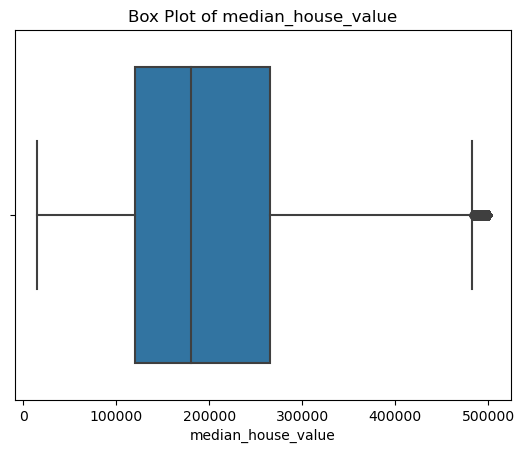

In [20]:
# Create a box plot
g = sns.boxplot(data = df, x = 'median_house_value')

# Add a title and change xlabel
g.set_title('Box Plot of median_house_value')
g.set_xlabel('median_house_value')

In [21]:
# Cálculo de percentiles
Q75 = df['median_house_value'].quantile(0.75)
Q25 = df['median_house_value'].quantile(0.25)

# Rango intercuartílico
IQR = Q75 - Q25

# Limite superior e inferior
lim_sup = Q75 + (1.5 * IQR)
lim_inf = Q25 - (1.5 * IQR)
print('IQR: ', IQR, '\nQ75: ', Q75, '\nQ25: ', Q25, '\nlim_inf: ', lim_inf, '\nlim_sup: ', lim_sup)

outliers = df[(df['median_house_value'] < lim_inf) | (df['median_house_value'] > lim_sup)]
print(f'Number of outliers: {len(outliers)}')

IQR:  145225.0 
Q75:  264700.0 
Q25:  119475.0 
lim_inf:  -98362.5 
lim_sup:  482537.5
Number of outliers: 1064


In [22]:
#coeficiente de asimetría de Fisher
df['median_house_value'].skew()

0.9789835031608397

In [23]:
#coeficiente de curtosis
df['median_house_value'].kurt()

0.3305096263331113

In [24]:
# Media y desviación típica dato reales
print('Media ->', df['median_house_value'].mean(), 'Desv ->', df['median_house_value'].std())

#Normalizamos los valor con una distribución estándar
from sklearn.preprocessing import StandardScaler

# Crea una instancia de StandardScaler
scaler = StandardScaler()

# Extrae la columna 'median_house_value' y conviértela en un array 2D
data_2d = df['median_house_value'].values.reshape(-1, 1)

# Aplica el escalado a los datos
df_z = scaler.fit_transform(data_2d)

# Media y la desviación estándar de los datos normalizados
print('Media ->', df_z.mean(), 'Des ->', df_z.std())
df_z = df_z.flatten()
df_z_df = pd.DataFrame(df_z, columns=['normalized_median_house_value'])

Media -> 206821.9284315645 Desv -> 115412.33745206622
Media -> 1.502616319993946e-16 Des -> 1.0


Área del histograma =  1.0 , luego verifica que es una funcion de densidad


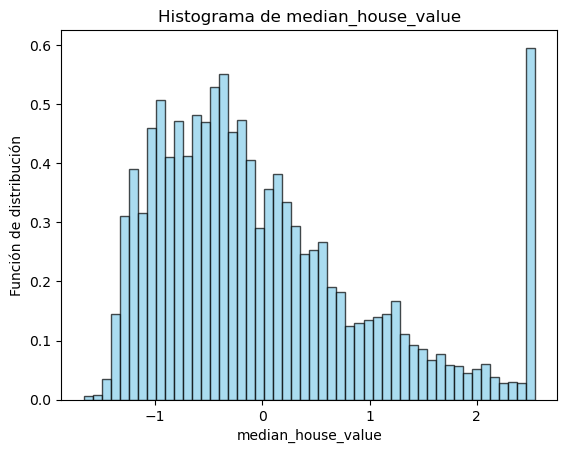

In [25]:
# Crear la función de densidad kernel (KDE)
edades_edificios = df_z

# Graficar el histograma y la función de densidad
hist, bins = np.histogram(edades_edificios, bins=10, density=True)
plt.hist(edades_edificios, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histograma')
plt.title('Histograma de median_house_value')
plt.xlabel('median_house_value')
plt.ylabel('Función de distribución')

# Calcular el ancho de cada barra del histograma
widths = np.diff(bins)

# Calcular el área total del histograma
area_histograma = np.sum(hist * widths)

print("Área del histograma = ", area_histograma, ", luego verifica que es una funcion de densidad")

In [26]:
# Media y desviación típica dato reales
print('Media ->', df['median_income'].mean(), 'Desv ->', df['median_income'].std())

#Normalizamos los valor con una distribución estándar
from sklearn.preprocessing import StandardScaler

# Crea una instancia de StandardScaler
scaler = StandardScaler()

# Extrae la columna 'median_house_value' y conviértela en un array 2D
data_2d = df['median_income'].values.reshape(-1, 1)

# Aplica el escalado a los datos
df_zi = scaler.fit_transform(data_2d)

# Media y la desviación estándar de los datos normalizados
print('Media ->', df_zi.mean(), 'Des ->', df_zi.std())
df_median_income = df_zi.flatten()
df_median_income_df = pd.DataFrame(df_z, columns=['normalized_median_income'])

Media -> 3.8714373849618644 Desv -> 1.8994316945924181
Media -> 1.1130491259214414e-16 Des -> 1.0


Training Mean Squared Error: 2.206029835301718e-31
Testing Mean Squared Error: 2.1052681551021047e-31
Coefficient w1: [[1.]]
Intercept w0: [-3.46944695e-18]


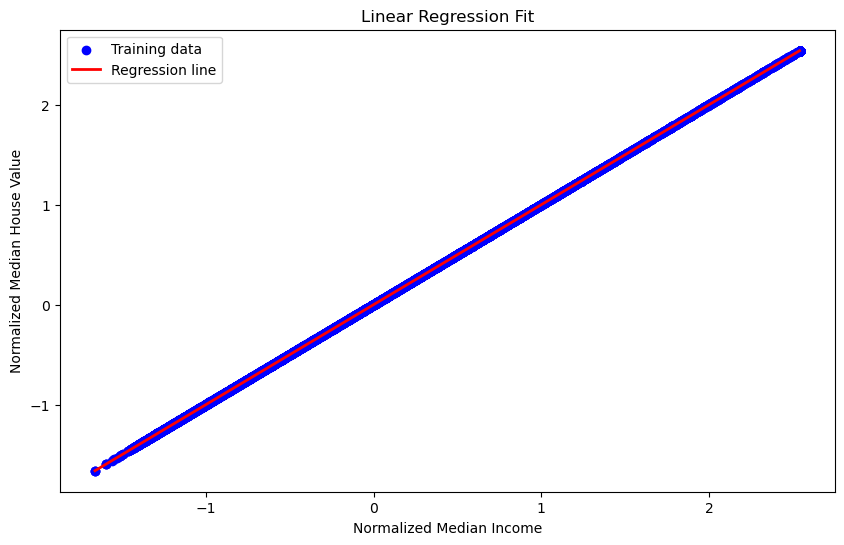

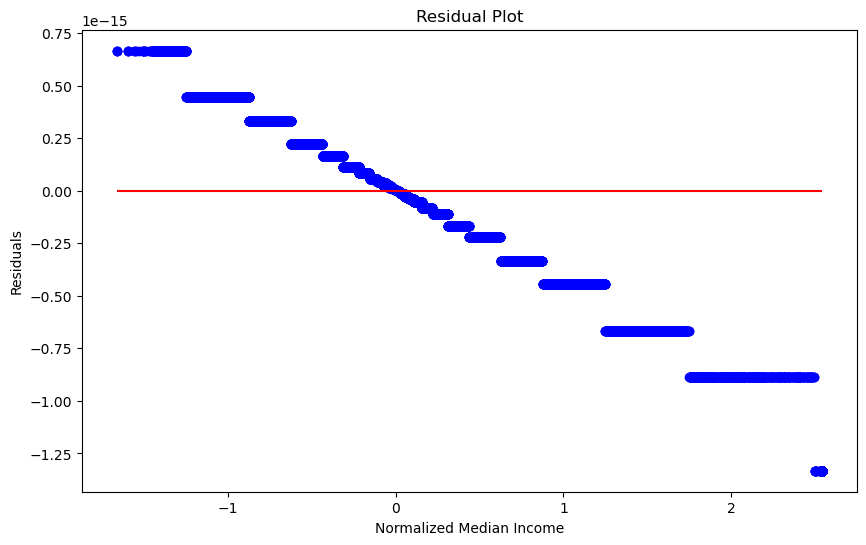

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_median_income_df, df_z_df, random_state=20)

# Create and fit the linear regression model
lr = LinearRegression().fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = lr.predict(X_train)

# Make predictions on the test set
y_pred_test = lr.predict(X_test)

# Calculate and print the Mean Squared Error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Training Mean Squared Error:", mse_train)
print("Testing Mean Squared Error:", mse_test)

# Print the coefficients
print("Coefficient w1:", lr.coef_)
print("Intercept w0:", lr.intercept_)

# Flatten X_train for plotting
X_train_flat = X_train.values.flatten()

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))

# Scatter plot of the original data points
plt.scatter(X_train_flat, y_train, color='blue', label='Training data')

# Sort the values for a better-looking line plot
sorted_indices = np.argsort(X_train_flat)
X_train_flat_sorted = X_train_flat[sorted_indices]
y_pred_train_sorted = y_pred_train[sorted_indices]

# Plot the regression line
plt.plot(X_train_flat_sorted, y_pred_train_sorted, color='red', linewidth=2, label='Regression line')

# Add labels and title
plt.xlabel('Normalized Median Income')
plt.ylabel('Normalized Median House Value')
plt.title('Linear Regression Fit')
plt.legend()

# Display the plot
plt.show()

# Plot residuals in order to see if the linear regression migth be appropiate
plt.figure(figsize=(10, 6))
residuals = y_train - y_pred_train
plt.scatter(X_train_flat, residuals, color='blue')
plt.hlines(y=0, xmin=min(X_train_flat), xmax=max(X_train_flat), color='red')
plt.xlabel('Normalized Median Income')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [28]:
print('Media ->', df['total_rooms'].mean(), 'Desv ->', df['total_rooms'].std())

scaler_total_rooms = StandardScaler()
data_total_rooms_2d = df['total_rooms'].values.reshape(-1, 1)
df_total_rooms = scaler_total_rooms.fit_transform(data_total_rooms_2d)

print('Media ->', df_total_rooms.mean(), 'Des ->', df_total_rooms.std())

df_total_rooms = df_total_rooms.flatten()
df_total_rooms_df = pd.DataFrame(df_total_rooms, columns=['normalized_total_rooms'])


Media -> 2636.764147248874 Desv -> 2185.4514086076547
Media -> 5.565245629607207e-17 Des -> 0.9999999999999999


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_total_rooms_df, df_z_df, random_state=20)

# Create and fit the linear regression model
lr = LinearRegression().fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = lr.predict(X_train)

# Make predictions on the test set
y_pred_test = lr.predict(X_test)

# Calculate and print the Mean Squared Error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Training Mean Squared Error:", mse_train)
print("Testing Mean Squared Error:", mse_test)

# Print the coefficients
print("Coefficient w1:", lr.coef_)
print("Intercept w0:", lr.intercept_)

# Flatten X_train for plotting
X_train_flat = X_train.values.flatten()

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))

# Scatter plot of the original data points
plt.scatter(X_train_flat, y_train, color='blue', label='Training data')

# Sort the values for a better-looking line plot
sorted_indices = np.argsort(X_train_flat)
X_train_flat_sorted = X_train_flat[sorted_indices]
y_pred_train_sorted = y_pred_train[sorted_indices]

# Plot the regression line
plt.plot(X_train_flat_sorted, y_pred_train_sorted, color='red', linewidth=2, label='Regression line')

# Add labels and title
plt.xlabel('Normalized Total Rooms')
plt.ylabel('Normalized Median House Value')
plt.title('Linear Regression Fit')
plt.legend()

# Display the plot
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
residuals = y_train - y_pred_train
plt.scatter(X_train_flat, residuals, color='blue')
plt.hlines(y=0, xmin=min(X_train_flat), xmax=max(X_train_flat), color='red')
plt.xlabel('Normalized Total Rooms')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
print('Media ->', df['latitude'].mean(), 'Desv ->', df['latitude'].std())

scaler_latitude = StandardScaler()
data_latitude_2d = df['latitude'].values.reshape(-1, 1)
df_latitude = scaler_latitude.fit_transform(data_latitude_2d)

print('Media ->', df_latitude.mean(), 'Des ->', df_latitude.std())

df_latitude = df_latitude.flatten()
df_latitude_df = pd.DataFrame(df_latitude, columns=['normalized_latitude'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_latitude_df, df_z_df, random_state=20)

# Create and fit the linear regression model
lr = LinearRegression().fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = lr.predict(X_train)

# Make predictions on the test set
y_pred_test = lr.predict(X_test)

# Calculate and print the Mean Squared Error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Training Mean Squared Error:", mse_train)
print("Testing Mean Squared Error:", mse_test)

# Print the coefficients
print("Coefficient w1:", lr.coef_)
print("Intercept w0:", lr.intercept_)

# Flatten X_train for plotting
X_train_flat = X_train.values.flatten()

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))

# Scatter plot of the original data points
plt.scatter(X_train_flat, y_train, color='blue', label='Training data')

# Sort the values for a better-looking line plot
sorted_indices = np.argsort(X_train_flat)
X_train_flat_sorted = X_train_flat[sorted_indices]
y_pred_train_sorted = y_pred_train[sorted_indices]

# Plot the regression line
plt.plot(X_train_flat_sorted, y_pred_train_sorted, color='red', linewidth=2, label='Regression line')

# Add labels and title
plt.xlabel('Normalized Latitude')
plt.ylabel('Normalized Median House Value')
plt.title('Linear Regression Fit')
plt.legend()

# Display the plot
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
residuals = y_train - y_pred_train
plt.scatter(X_train_flat, residuals, color='blue')
plt.hlines(y=0, xmin=min(X_train_flat), xmax=max(X_train_flat), color='red')
plt.xlabel('Normalized Latitude')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()